# Who is the typical coder?

## Setup

In [1]:
import pandas as pd
# import numpy as np

pd.options.display.max_columns = 200
pd.options.display.max_colwidth = 500
pd.options.display.max_rows = 100

%matplotlib inline

## Business/Data understanding

What does the typical coder look like? What can we learn from the frequency of responses to the Stackoverflow survey?

In [2]:
questions = pd.read_csv("data/survey_results_schema.csv")

questions

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open source software (OSS)?
5,Employment,Which of the following best describes your current employment status?
6,Country,In which country do you currently reside?
7,Student,"Are you currently enrolled in a formal, degree-granting college or university program?"
8,EdLevel,Which of the following best describes the highest level of formal education that you’ve completed?
9,UndergradMajor,What was your main or most important field of study?


In [3]:
responses = pd.read_csv("data/survey_results_public.csv")

responses.describe(include="all")

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
count,88883.000000,88331,88883,88883,86842,87181,88751,87014,86390,75614,84260,71791,81335,87938,87634,74331,72847,70988,61159,61157,61232,80555,79854,67155,71344,79371,77877,71392,71392,5.594500e+04,63268,5.582300e+04,64503.000000,68914,68141,70284,70055,71779,70390,49790.000000,62668,61108,62029,87569,84088,76026,69147,80714,77443,65022,62944,59586,64511,87317,87851,85366,48175,60165,86269,87141,86663,84437,87305,80486,83877,88263,88086,87816,86344,68378,87828,74692,88066,87841,88131,85855,69560,79210.000000,85406,83607,76147,76668,83059,86984,87081
unique,NaN,5,2,4,3,6,179,3,9,12,492,9,13141,52,69,52,5,5,4,3,4,3,6,63,2,175,6,143,144,NaN,3,NaN,NaN,3,129,7,3,5,3,NaN,4,4,3,20098,27259,3478,3923,8731,10795,2142,2312,2783,5565,7716,4,21,5,5,2,4,3,14,3,5,13,6,63,5,5,4,3,6,3,3,6,6,15,NaN,7,2,7,196,2,3,3
top,NaN,I am a developer by profession,Yes,Never,The quality of OSS and closed source software is about the same,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering","Taught yourself a new language, framework, or tool without taking a formal course",20 to 99 employees,"Developer, full-stack",5,15,2,Very satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new opportunities",Less than a year ago,Interview with people in peer roles;Interview with people in senior / management roles,No,"Languages, frameworks, and other technologies I'd be working with;Office environment or company culture;Opportunities for professional development",I was preparing for a job search,USD,United States dollar,NaN,Yearly,NaN,NaN,"There is a schedule and/or spec (made by me or by a colleague), and my work somewhat aligns",Being tasked with non-development work;Distracting work environment;Meetings,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",NaN,"Yes, it's part of our process",Developers and management have nearly equal input into purchasing new technology,I have little or no influence,HTML/CSS;JavaScript;PHP;SQL,Python,MySQL,PostgreSQL,Windows,Linux,jQuery,React.js,Node.js,Node.js,Visual Studio Code,Windows,I do not use containers,Not at all,Useful across many domains and could change many aspects of our lives,Yes,Yes,Yes,Reddit,In real life (in person),Username,I don't remember,Daily or almost daily,Find answers to specific questions,1-2 times per week,Stack Overflow was much faster,11-30 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Tech meetups or events in your area;Courses on technologies you're interested in,NaN,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
freq,NaN,65679,71257,32295,41527,64440,20949,65816,39134,47214,6699,15199,8433,7047,8681,795

### Top responses

In [21]:
topResponses = responses.describe(include="all").T[["top", "freq"]].set_index(["top"], append=True).dropna().sort_values(by="freq", ascending=False)
topResponses

,,freq
,top,
Trans,No,82576
Gender,Man,77919
SOAccount,Yes,75192
Hobbyist,Yes,71257
Sexuality,Straight / Heterosexual,70155
OffOn,Yes,67740
Student,No,65816
MainBranch,I am a developer by profession,65679
Employment,Employed full-time,64440


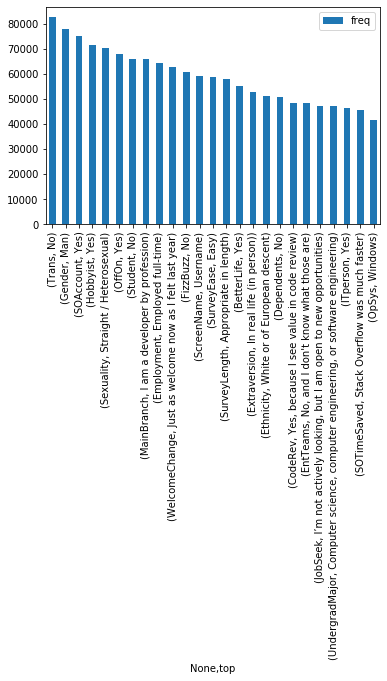

In [20]:
topResponses[:25].plot(kind="bar")

In [31]:
responses[(responses.Trans == "No")
         & (responses.Gender == "Man")
         & (responses.SOAccount == "Yes")
         & (responses.Hobbyist == "Yes")
         & (responses.Sexuality == "Straight / Heterosexual")
         & (responses.OffOn == "Yes")
         & (responses.Student == "No")
         & (responses.MainBranch == "I am a developer by profession")
         & (responses.Employment == "Employed full-time")
         & (responses.WelcomeChange == "Just as welcome now as I felt last year")
         ].shape[0] / responses.shape[0]
         
# Trans 	No 	82576
# Gender 	Man 	77919
# SOAccount 	Yes 	75192
# Hobbyist 	Yes 	71257
# Sexuality 	Straight / Heterosexual 	70155
# OffOn 	Yes 	67740
# Student 	No 	65816
# MainBranch 	I am a developer by profession 	65679
# Employment 	Employed full-time 	64440
# WelcomeChange 	Just as welcome now as I felt last year 	62661
# FizzBuzz 	No 	60873

0.19089139655502177

## Data Preparation

In [36]:
df = responses.copy()
df.shape

(88883, 85)

There's a lot of ways we could slice this pie but let's focus on the Basic Information section to start with as that will give as manageable number of nicely grouped fields.

In [27]:
selection = ["MainBranch", "Hobbyist", "OpenSourcer", "OpenSource", "Employment", "Country"]

pd.options.display.max_colwidth = 100
pd.options.display.max_columns = 100

df[selection].describe(include="all")

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country
count,88331,88883,88883,86842,87181,88751
unique,5,2,4,3,6,179
top,I am a developer by profession,Yes,Never,The quality of OSS and closed source software is about the same,Employed full-time,United States
freq,65679,71257,32295,41527,64440,20949


In [17]:
topOnes = df[(df.MainBranch == "I am a developer by profession") & (df.Hobbyist == "Yes")
             & (df.OpenSourcer == "Never")
             & (df.OpenSource == "The quality of OSS and closed source software is about the same")
             & (df.Employment == "Employed full-time") & (df.Country == "United States")]

topOnes.describe(include="all")

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,BasicInfoCombo
count,6457.000000,6457,6457,6457,6457,6457,6457,6399,6354,6007,...,5202,5987.000000,6293,6215,5792,5818,6158,6354,6373,6457
unique,NaN,1,1,1,1,1,124,3,9,12,...,15,NaN,7,2,7,67,2,3,3,124
top,NaN,I am a developer by profession,Yes,Never,The quality of OSS and closed source software is about the same,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",...,Tech articles written by other developers;Industry news about technologies you're interested in;Tech meetups or events in your area;Courses on technologies you're interested in,NaN,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,I am a developer by profession~~Yes~~Never~~The quality of OSS and closed source software is about the same~~Employed full-time~~United States
freq,NaN,6457,6457,6457,6457,6457,1801,5580,3512,3905,...,1214,NaN,5726,6182,5417,4180,3913,4354,4623,1801
mean,45047.114914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,30.882412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,25697.102576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.990574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,22720.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,45365.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,67663.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
len(topOnes) / len(df)

0.020262592396746285

SO even just based on those 6 fields we have narrowed the "typical" coder down to just 2% of the entire cohort.

Just because each field contains the most frequent value it doesn't mean the combination is the most frequest. So now let's see if we can find the combination of answers which produces the most matches...

In [14]:
df["BasicInfoCombo"] = df["MainBranch"] + "~~" + df["Hobbyist"] + "~~" + df["OpenSourcer"] + "~~" + df["OpenSource"] + "~~" + df["Employment"] + "~~" + df["Country"]
    
df["BasicInfoCombo"].value_counts()[:5]

I am a developer by profession~~Yes~~Less than once per year~~The quality of OSS and closed source software is about the same~~Employed full-time~~United States                                               1873
I am a developer by profession~~Yes~~Never~~The quality of OSS and closed source software is about the same~~Employed full-time~~United States                                                                 1801
I am a developer by profession~~Yes~~Less than once a month but more than once per year~~The quality of OSS and closed source software is about the same~~Employed full-time~~United States                    1524
I am a developer by profession~~Yes~~Less than once per year~~OSS is, on average, of HIGHER quality than proprietary / closed source software~~Employed full-time~~United States                               1359
I am a developer by profession~~Yes~~Less than once a month but more than once per year~~OSS is, on average, of HIGHER quality than proprietary / closed

In [15]:
topCombo = df[(df.MainBranch == "I am a developer by profession") & (df.Hobbyist == "Yes")
             & (df.OpenSourcer == "Less than once per year")
             & (df.OpenSource == "The quality of OSS and closed source software is about the same")
             & (df.Employment == "Employed full-time") & (df.Country == "United States")]

topCombo.describe(include="all")

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,BasicInfoCombo
count,1873.000000,1873,1873,1873,1873,1873,1873,1871,1868,1792,...,1354,1732.000000,1810,1807,1721,1745,1820,1850,1860,1873
unique,NaN,1,1,1,1,1,1,3,9,12,...,15,NaN,5,2,5,45,2,3,3,1
top,NaN,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software is about the same,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",...,Tech articles written by other developers;Industry news about technologies you're interested in;Tech meetups or events in your area;Courses on technologies you're interested in,NaN,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,I am a developer by profession~~Yes~~Less than once per year~~The quality of OSS and closed source software is about the same~~Employed full-time~~United States
freq,NaN,1873,1873,1873,1873,1873,1873,1754,1141,1130,...,267,NaN,1652,1790,1587,1420,1037,1437,1381,1873
mean,44151.398825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,34.034065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,25995.611580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.969587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,21753.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,44105.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,65869.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
len(topCombo) / len(df)

0.02107264606280166

And as suspected the combination of modal values did NOT give the most frequest combination. He (and unsurprisingly it is a he) does a little more open-sourcing than we first determined.

Now arguably including Country is skewing the results somewhat so let's take that out see where we are

In [18]:
topOnes = df[(df.MainBranch == "I am a developer by profession") & (df.Hobbyist == "Yes")
             & (df.OpenSourcer == "Never")
             & (df.OpenSource == "The quality of OSS and closed source software is about the same")
             & (df.Employment == "Employed full-time")]

topOnes.describe(include="all")

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,BasicInfoCombo
count,6457.000000,6457,6457,6457,6457,6457,6457,6399,6354,6007,...,5202,5987.000000,6293,6215,5792,5818,6158,6354,6373,6457
unique,NaN,1,1,1,1,1,124,3,9,12,...,15,NaN,7,2,7,67,2,3,3,124
top,NaN,I am a developer by profession,Yes,Never,The quality of OSS and closed source software is about the same,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",...,Tech articles written by other developers;Industry news about technologies you're interested in;Tech meetups or events in your area;Courses on technologies you're interested in,NaN,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,I am a developer by profession~~Yes~~Never~~The quality of OSS and closed source software is about the same~~Employed full-time~~United States
freq,NaN,6457,6457,6457,6457,6457,1801,5580,3512,3905,...,1214,NaN,5726,6182,5417,4180,3913,4354,4623,1801
mean,45047.114914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,30.882412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,25697.102576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.990574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,22720.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,45365.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,67663.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
len(topOnes) / len(df)

0.07264606280166061

Up to 7% for the single fields modes. And the combined mode...

In [20]:
df["BasicInfoCombo"] = df["MainBranch"] + "~~" + df["Hobbyist"] + "~~" + df["OpenSourcer"] + "~~" + df["OpenSource"] + "~~" + df["Employment"]
    
df["BasicInfoCombo"].value_counts()[:5]

I am a developer by profession~~Yes~~Never~~The quality of OSS and closed source software is about the same~~Employed full-time                                                                 6457
I am a developer by profession~~Yes~~Less than once per year~~The quality of OSS and closed source software is about the same~~Employed full-time                                               6415
I am a developer by profession~~Yes~~Less than once per year~~OSS is, on average, of HIGHER quality than proprietary / closed source software~~Employed full-time                               5545
I am a developer by profession~~Yes~~Less than once a month but more than once per year~~OSS is, on average, of HIGHER quality than proprietary / closed source software~~Employed full-time    5366
I am a developer by profession~~Yes~~Less than once a month but more than once per year~~The quality of OSS and closed source software is about the same~~Employed full-time                    5329
Name: BasicInfo

In [28]:
topCombo = df[(df.MainBranch == "I am a developer by profession") & (df.Hobbyist == "Yes")
             & (df.OpenSourcer == "Never")
             & (df.OpenSource == "The quality of OSS and closed source software is about the same")
             & (df.Employment == "Employed full-time")]

topCombo.describe(include="all")

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,BasicInfoCombo
count,6457.000000,6457,6457,6457,6457,6457,6457,6399,6354,6007,6202,6294,6407,6423,6408,6417,6457,6439,6191,6192,6197,6457,6431,6052,6381,6401,6326,6457,6457,5.261000e+03,5849,5.255000e+03,5999.000000,6302,6196,6399,6379,6398,6393,4288.000000,6336,6175,6286,6419,6163,5744,5187,5892,5653,5039,4858,4456,4902,6408,6413,6284,4555,4204,6318,6382,6359,6266,6393,5966,6197,6438,6428,6420,6346,4967,6436,5185,6418,6411,6429,6302,5202,5987.000000,6293,6215,5792,5818,6158,6354,6373,6457
unique,NaN,1,1,1,1,1,124,3,9,12,258,9,1458,51,40,45,5,5,4,3,4,3,6,63,2,149,6,93,93,NaN,3,NaN,NaN,3,129,7,3,5,3,NaN,4,4,3,2362,3164,850,1004,1464,1933,572,664,449,992,1290,4,16,5,5,2,4,3,13,3,5,13,6,55,5,5,4,3,6,3,3,6,6,15,NaN,7,2,7,67,2,3,3,1
top,NaN,I am a developer by profession,Yes,Never,The quality of OSS and closed source software is about the same,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering","Taught yourself a new language, framework, or tool without taking a formal course",20 to 99 employees,"Developer, full-stack",10,16,2,Very satisfied,Slightly satisfied,Very confident,No,Not sure,"I’m not actively looking, but I am open to new opportunities",Less than a year ago,Interview with people in peer roles;Interview with people in senior / management roles,No,"Languages, frameworks, and other technologies I'd be working with;Office environment or company ...",I was preparing for a job search,USD,United States dollar,NaN,Yearly,NaN,NaN,"There is a schedule and/or spec (made by me or by a colleague), and my work somewhat aligns",Being tasked with non-development work;Distracting work environment;Meetings,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",NaN,"Yes, it's part of our process",Developers and management have nearly equal input into purchasing new technology,I have little or no influence,C#;HTML/CSS;JavaScript;SQL,C#;HTML/CSS;JavaScript;SQL,Microsoft SQL Server,Microsoft SQL Server,Windows,Windows,ASP.NET;jQuery,React.js,Node.js,Node.js,Visual Studio;Visual Studio Code,Windows,I do not use containers,Not at all,Useful for immutable record keeping outside of currency,Yes,Yes,Yes,Reddit,In real life (in person),Username,2010,Multiple times per day,Find answers to specific questions,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;...,NaN,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,I am a developer by profession~~Yes~~Never~~The quality of OSS and closed source software is abo...
freq,NaN,6457,6457,6457,6457,6457,1801,5580,3512,3905,673,1500,995,561,697,814,2625,2240,2565,3209,2368,3986,2193,1110,5459,518,2958,1900,1900,NaN,30

In [23]:
len(topCombo) / len(df)

0.07264606280166061

## Modelling

## Evaluation

## Deployment

Our non-open-sourcer retains his lead this time! We can also see that a number of other fields have clear most frequent values. With this (very) simple model we've built up quite a picture of the typical coder!

* Professional developer and a hobbyist
* Doesn't contribute to open source (but thinks the quality is about the same as a closed source software)
* Not a student 
* Has a Bachelor's degree majoring in Computer Science or similar
* Not actively looking for job (but open to new opportunities)
* Never been asked to solve FizzBuzz
* Works to a schedule (somewhat)
* Works from home less than once per month (or never) and prefers working in the office
* Takes part in code reviews and sees the value in them
* Has little or influence on technology purchases at work
* Works on Windows and desn't use blockchain or containers
* Thinks people born today will have a better life than their parents
* Family IT support
* Prefers real life conversations
* Calls it their Username
* Straight white male with no dependents